In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline

# [random forests](https://en.wikipedia.org/wiki/Random_forest)  
 [Classification and regression by randomForest](https://www.researchgate.net/profile/Andy_Liaw/publication/228451484_Classification_and_Regression_by_RandomForest/links/53fb24cc0cf20a45497047ab/Classification-and-Regression-by-RandomForest.pdf)  
 [中文简介](http://blog.csdn.net/xbinworld/article/details/50450650)  
 整合bagging多棵决策树的结果

In [2]:
# 数据
iris = load_iris()
X = iris.data
target = iris.target

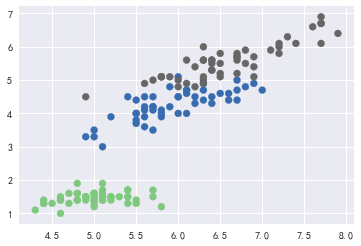

In [3]:
plt.scatter(X[:,0],X[:,2],c=target,cmap=plt.cm.Accent)

- baseline 决策树-聚类

In [4]:
#DecisionTree分类
clf = DecisionTreeClassifier()
R2squared = np.mean(cross_val_score(clf,iris.data,iris.target))
R2squared

0.96037581699346397

In [11]:
#random forests
forests = RandomForestClassifier()
R2squared = np.mean(cross_val_score(forests,iris.data,iris.target))
R2squared

0.95383986928104569

- 决策树和random forests预测效果（R<sup>2</sup>）比较  

|决策树 | random forests|
|---   | --------------|
|0.9604 | 0.9538      |


# GradientBoosting trees 回归  
整合bagging多棵决策树的结果  
[GBM](https://projecteuclid.org/download/pdf_1/euclid.aos/1013203451)  
[gradient boosting tree介绍](http://xgboost.readthedocs.io/en/latest/model.html)  
[gradient boosting tree中文介绍](http://www.cnblogs.com/zhubinwang/p/5170087.html)

In [6]:
#boston 房价
boston = datasets.load_boston()

- baseline 决策树回归

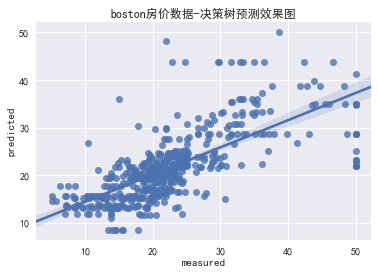

In [7]:
#决策树回归
DTr = DecisionTreeRegressor()
predicts = cross_val_predict(DTr,boston.data,boston.target)
ax = sns.regplot(boston.target, predicts)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title('boston房价数据-决策树预测效果图')

- gradient boosting machine 回归

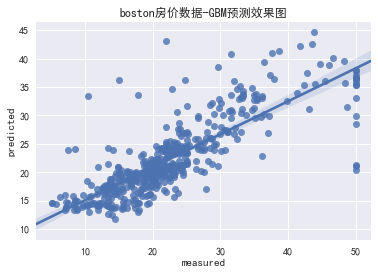

In [8]:
gbm = GradientBoostingRegressor(n_estimators =500,
                                max_depth=4,
                                learning_rate = .01,
                                min_samples_split = 3)
predicts1 = cross_val_predict(gbm,boston.data,boston.target)
ax = sns.regplot(boston.target, predicts1)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title('boston房价数据-GBM预测效果图')

- 决策树和GBM回归效果(R<sup>2</sup>)比较

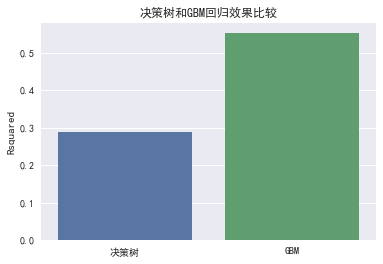

In [9]:
r2dt = cross_val_score(DTr,boston.data,boston.target)
r2gbm = cross_val_score(gbm,boston.data,boston.target)
sns.barplot(['决策树','GBM'],[np.mean(r2dt),np.mean(r2gbm)])
plt.ylabel('Rsquared')
plt.title('决策树和GBM回归效果比较')